## Stroop Experiment

In [1]:
from __future__ import print_function
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from figures import (
                    univariate, 
                    boolean_bar,
                    qq_plot,
                    qq_plot_var
                    )

from tables import descriptive_table

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
# Data is stored in data folder within resources folder one level up
os.chdir('..')

In [3]:
file_loc = os.path.join("data", "stroopdata.csv")
df = pd.read_csv(file_loc, sep=',')

df.head(4)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687


## Descriptive Statistics

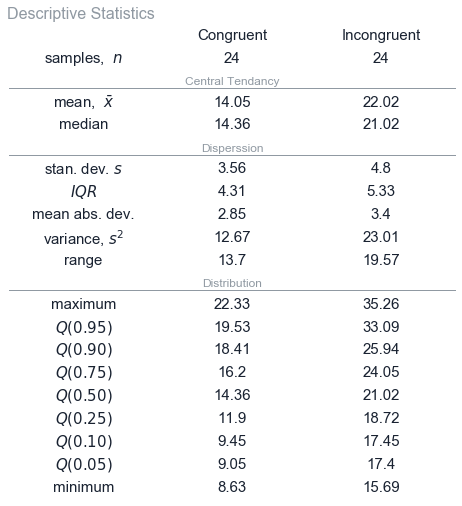

In [5]:
descriptive_table(df[["Congruent", "Incongruent"]], ["Congruent", "Incongruent"])

In [22]:
# Number of times congruent takes a greater time than incongruent test
(df[df["Congruent"] > df["Incongruent"]]).count()

Congruent      0
Incongruent    0
dtype: int64

## Visualise distribution

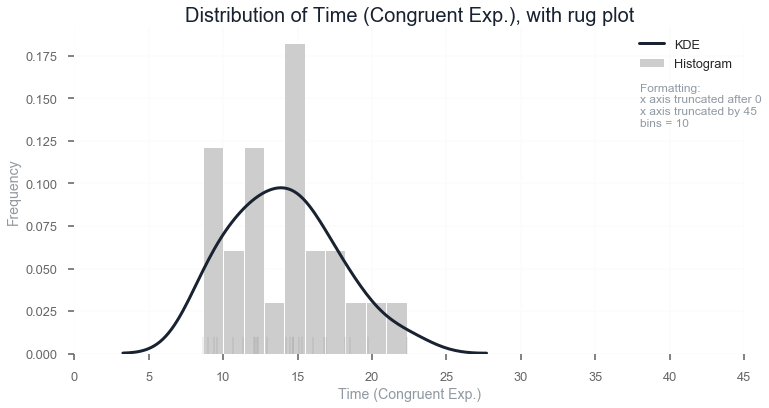

In [7]:
univariate(df["Congruent"], "Time (Congruent Exp.)", bin_n=10, x_truncation_upper=45, x_truncation_lower=0)

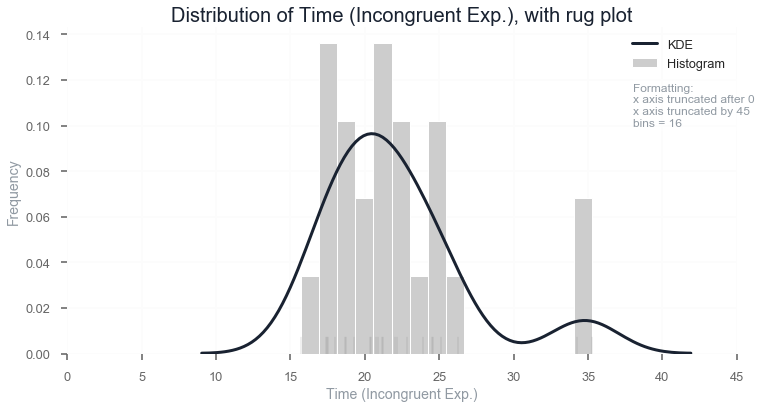

In [6]:
univariate(df["Incongruent"], "Time (Incongruent Exp.)", bin_n=16, x_truncation_upper=45, x_truncation_lower=0)

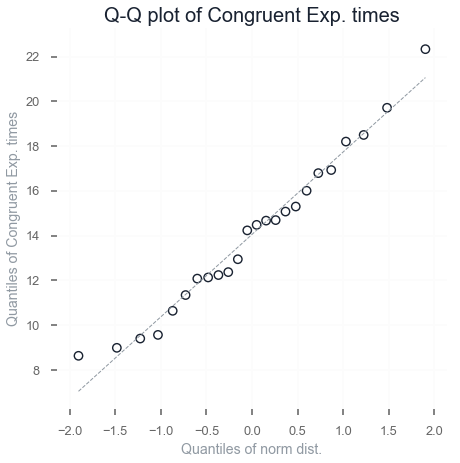

In [4]:
# qq plots should require 1000 samples, we only have 24
qq_plot(df["Congruent"], "Congruent Exp. times", ax_size=(7, 7))

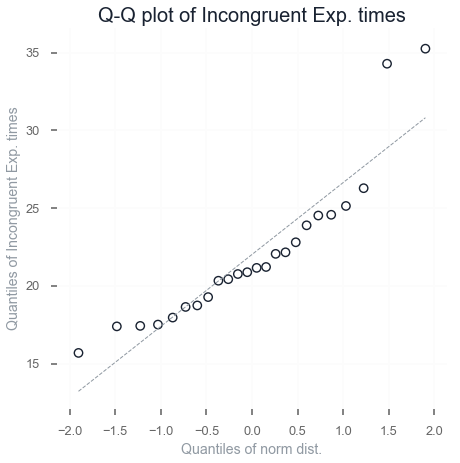

In [5]:
# qq plots should require 1000 samples, we only have 24
qq_plot(df["Incongruent"], "Incongruent Exp. times")

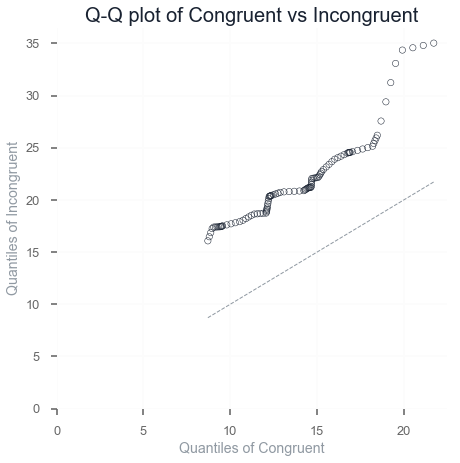

In [5]:
qq_plot_var(df["Congruent"], df["Incongruent"], "Congruent", "Incongruent", fit_zero=True)